In [1]:
# Importing the required libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [2]:
# Reading the csv file and putting it into 'df' object
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,RestingBP,Cholesterol,HeartDisease
0,40,M,140,289,0
1,49,F,160,180,1
2,37,M,130,283,0
3,48,F,138,214,1
4,54,M,150,195,0


Convert Sex column string to integer of numeric

In [3]:
from sklearn.preprocessing import LabelEncoder
le_sex = LabelEncoder()

df['Sex_n'] = le_sex.fit_transform(df['Sex'])

In [4]:
df = df.drop('Sex',axis=1)

In [5]:
df.head()

,Age,RestingBP,Cholesterol,HeartDisease,Sex_n
0,40,140,289,0,1
1,49,160,180,1,0
2,37,130,283,0,1
3,48,138,214,1,0
4,54,150,195,0,1


In [6]:
# Putting feature variable to X
X = df.drop('HeartDisease',axis=1)
# Putting response variable to y
y = df['HeartDisease']

In [7]:
# now lets split the data into train and test
from sklearn.model_selection import train_test_split

In [8]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((642, 4), (276, 4))

In [9]:
from sklearn.ensemble import RandomForestClassifier

In [10]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

In [11]:
%%time
classifier_rf.fit(X_train, y_train)

CPU times: total: 297 ms
Wall time: 223 ms


RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [12]:
# checking the oob score
classifier_rf.oob_score_

0.7024922118380063

Let’s do hyperparameter tuning for Random Forest using GridSearchCV and fit the data.

In [13]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [14]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

In [15]:
from sklearn.model_selection import GridSearchCV

In [16]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [17]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits
CPU times: total: 3.62 s
Wall time: 44.3 s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [18]:
grid_search.best_score_

0.7118497670807453

In [19]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=3, min_samples_leaf=20, n_estimators=10,
                       n_jobs=-1, random_state=42)

Now let’s visualize

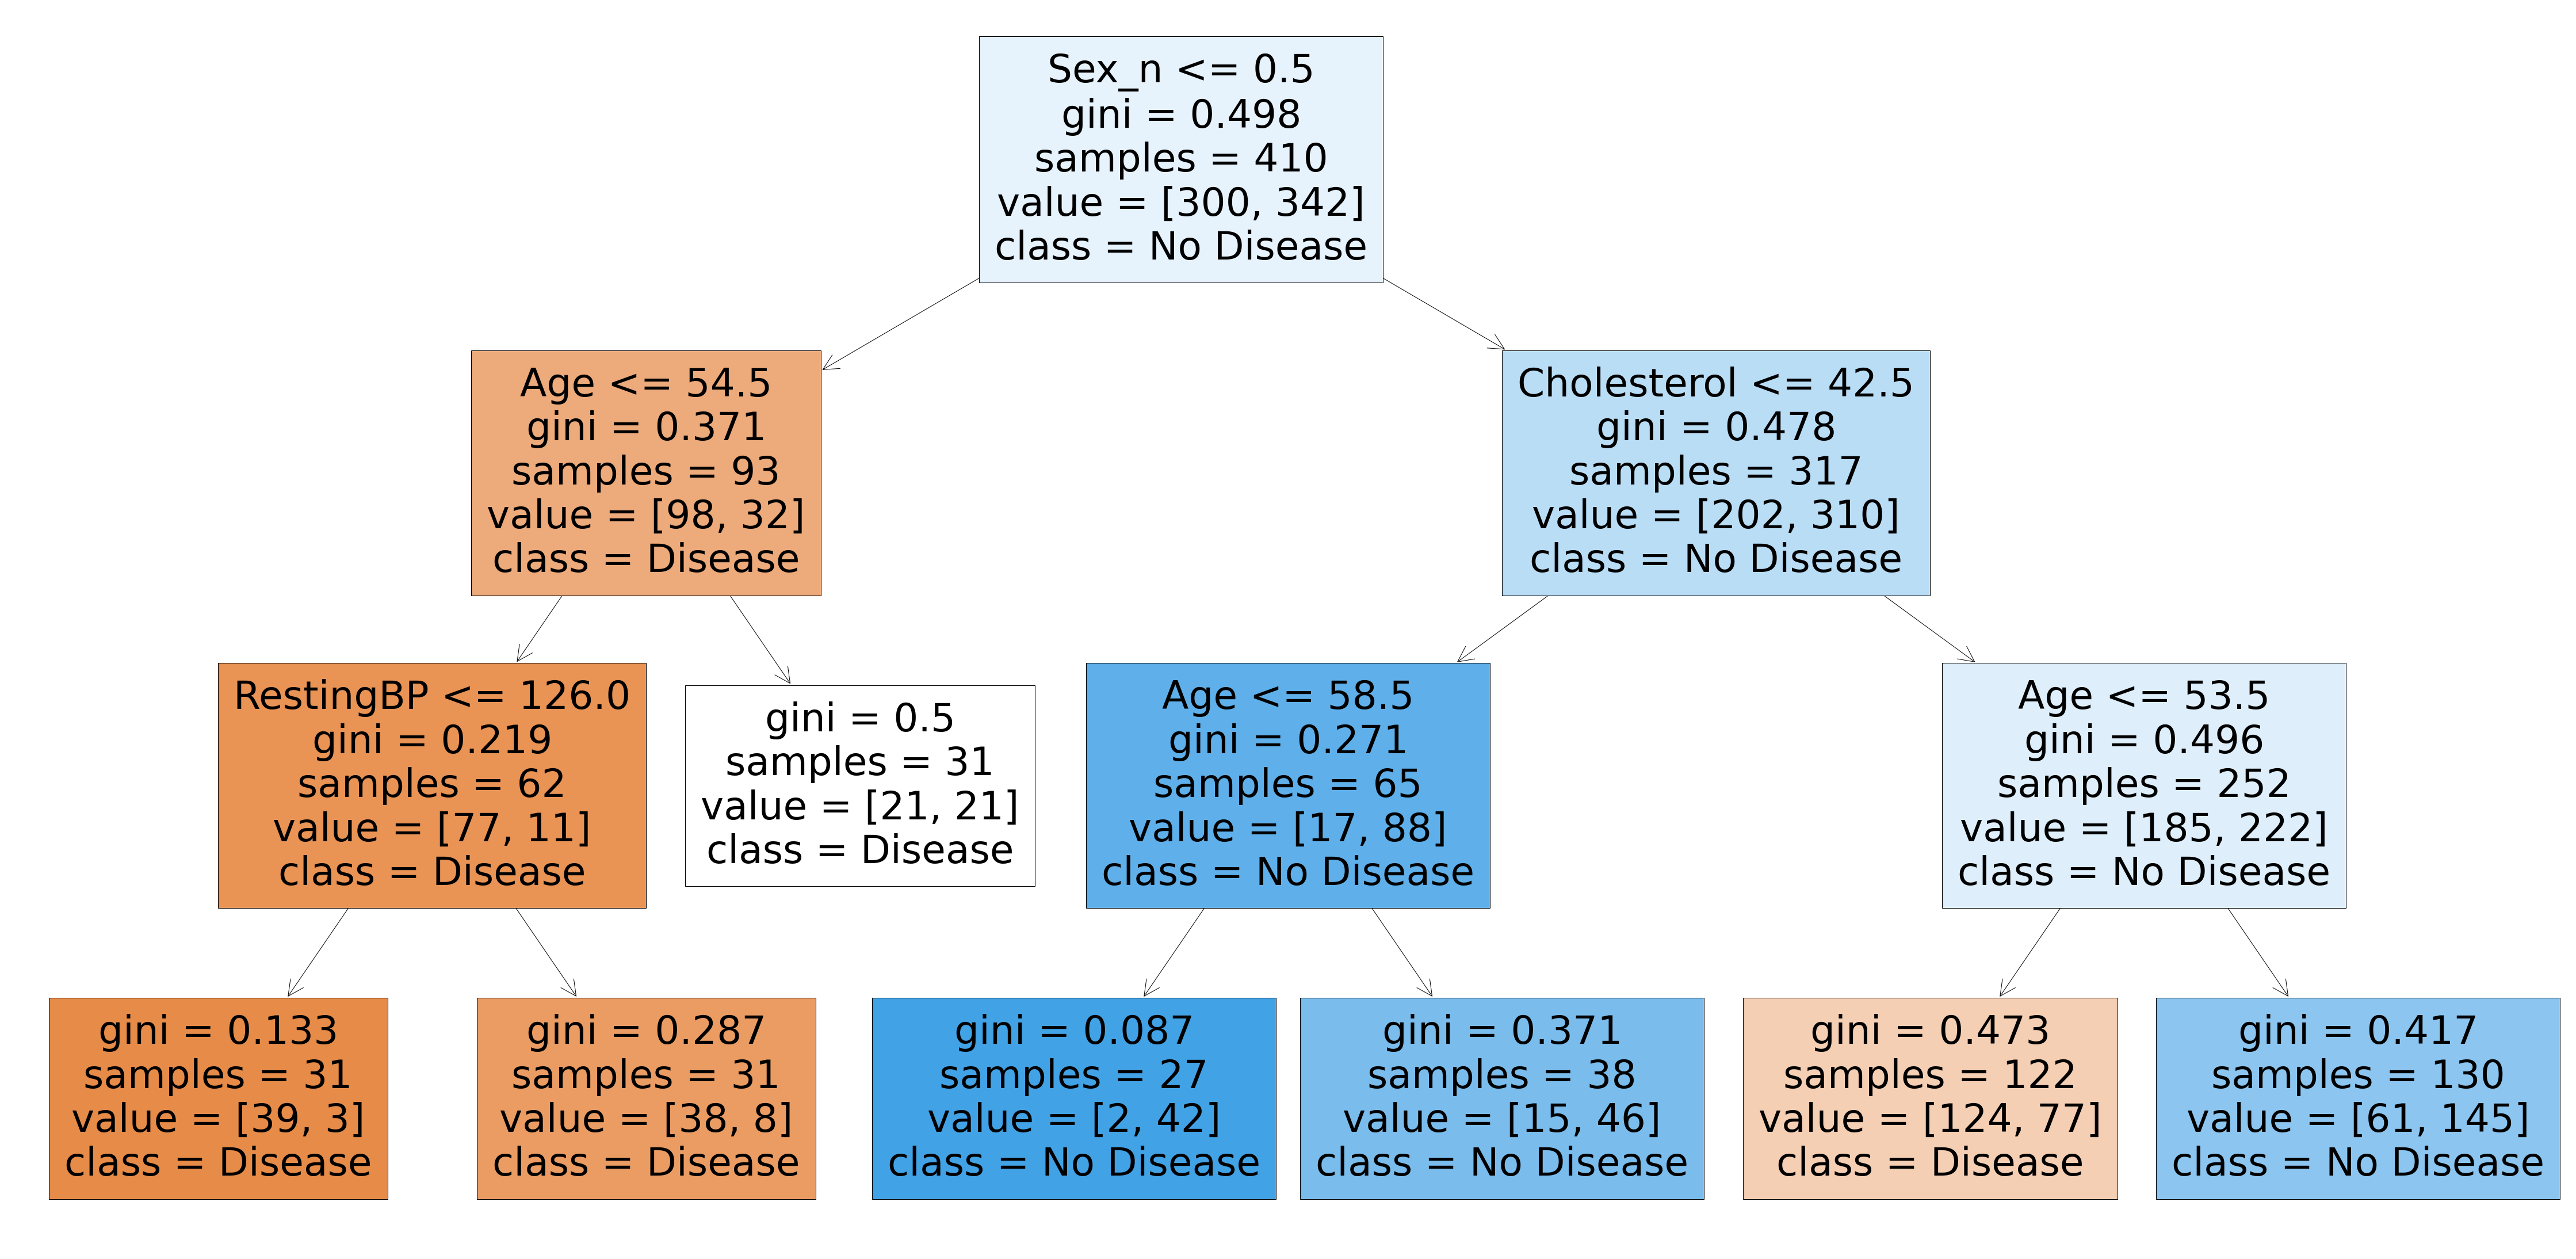

In [20]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[5], feature_names = X.columns,class_names=['Disease', "No Disease"],filled=True);

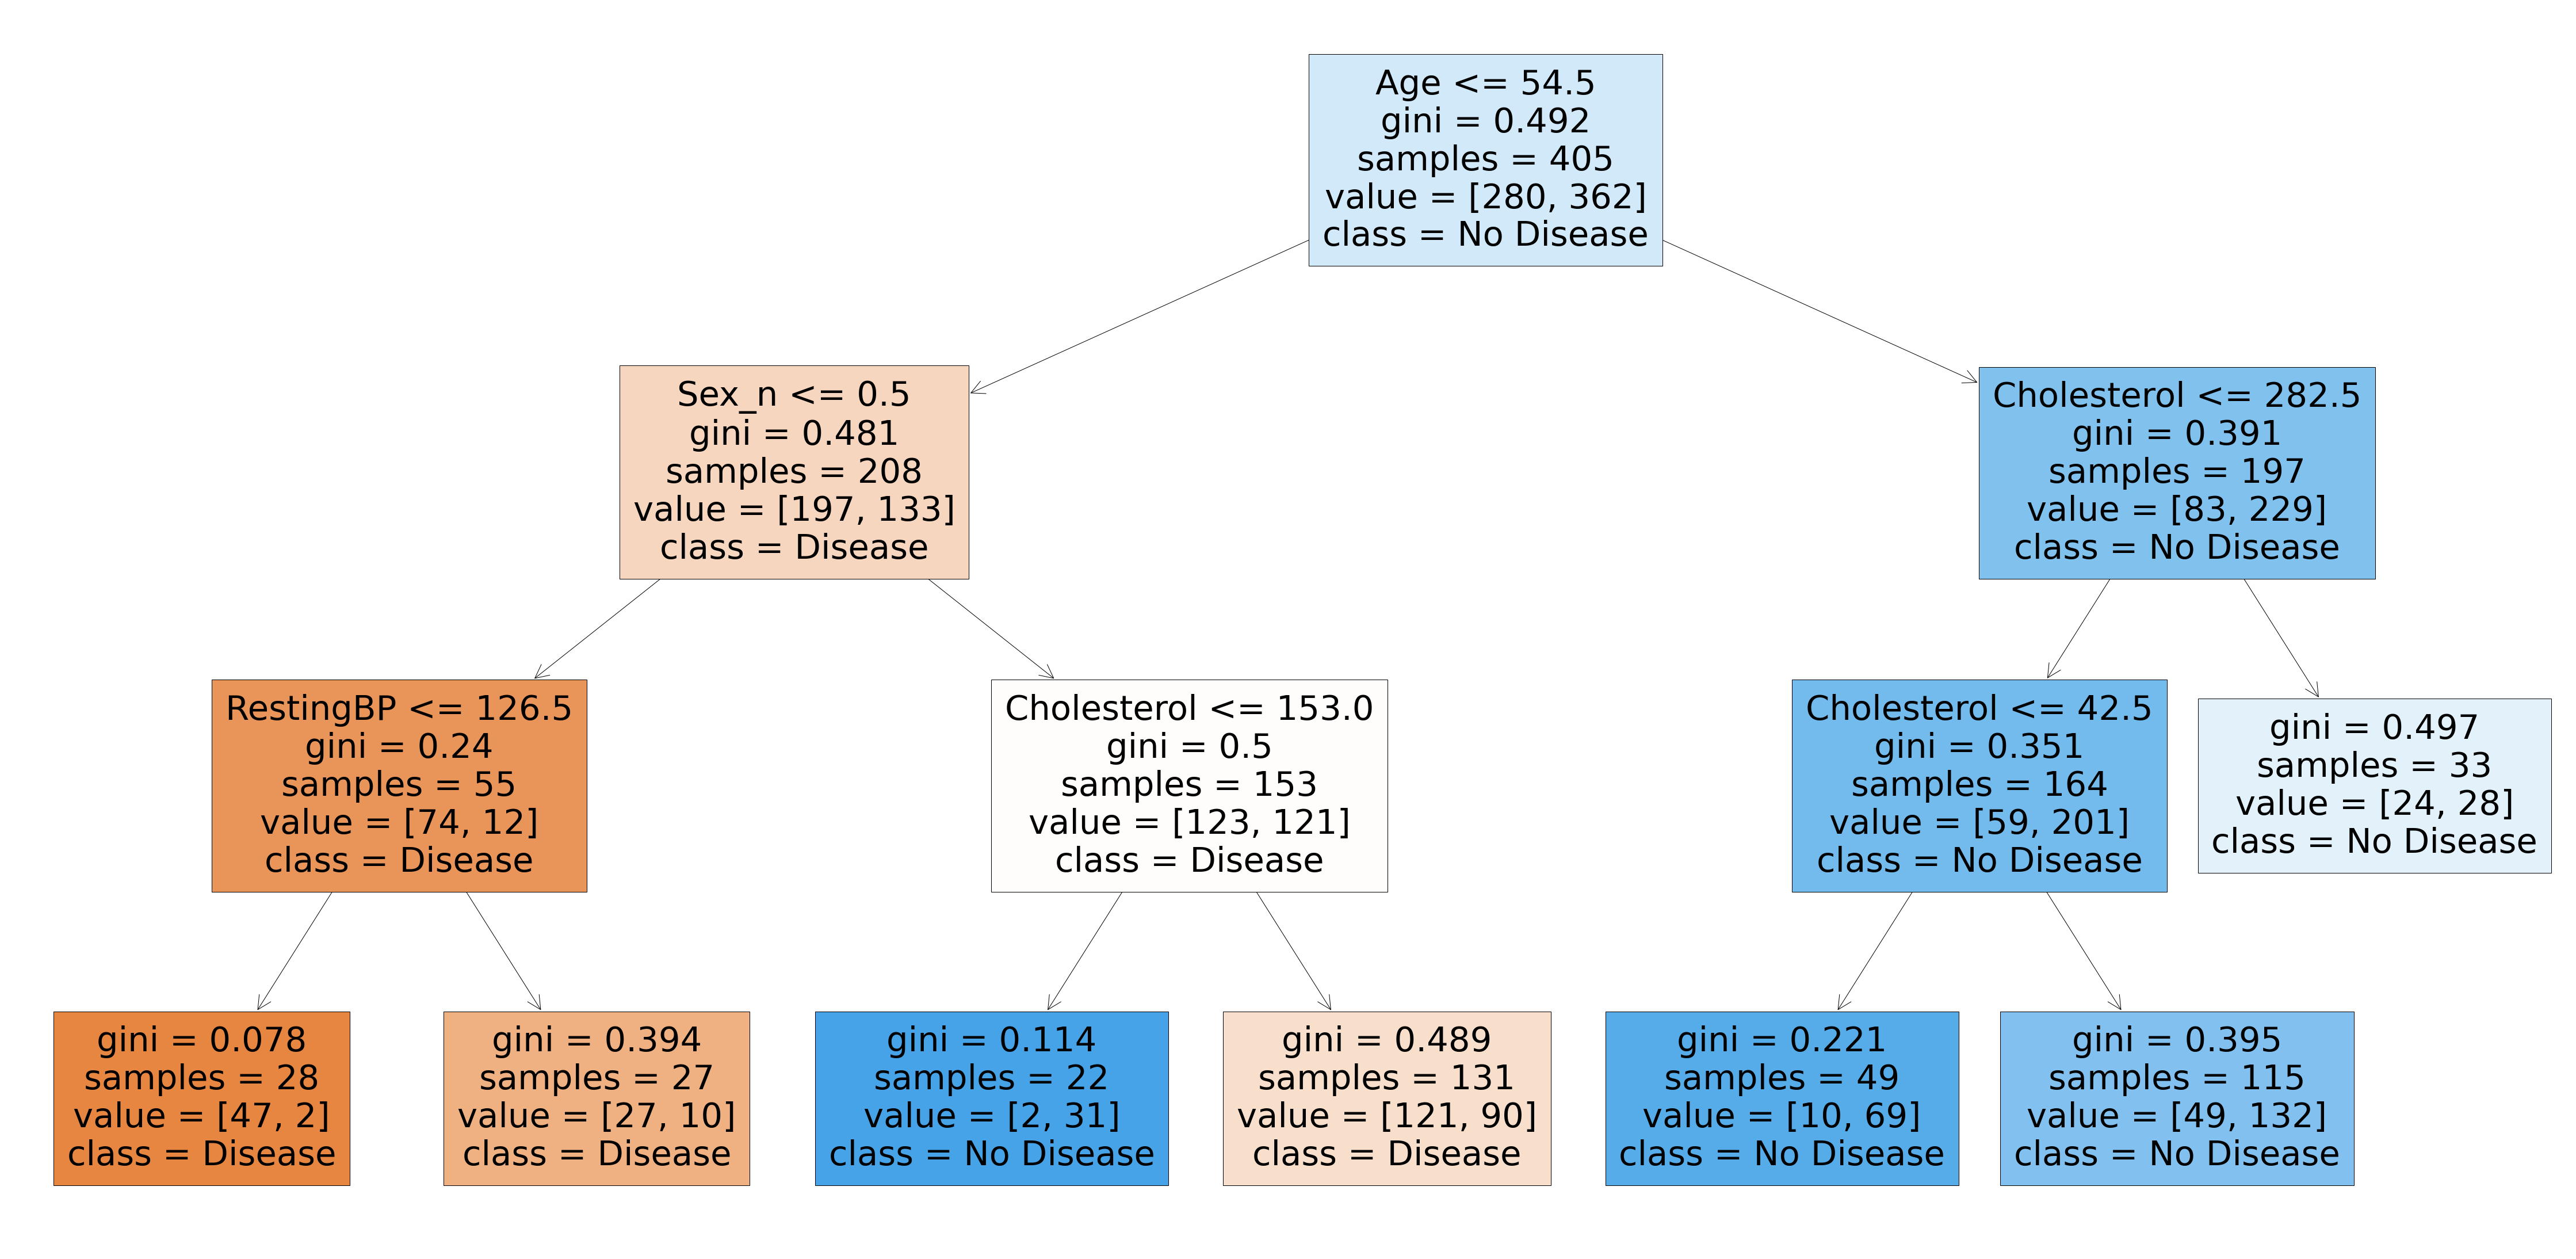

In [21]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[7], feature_names = X.columns,class_names=['Disease', "No Disease"],filled=True);

Now let’s sort the data with the help of feature importanc

In [22]:
rf_best.feature_importances_

array([0.41395033, 0.04227731, 0.25128497, 0.29248739])

In [23]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

In [24]:
imp_df.sort_values(by="Imp", ascending=False)


,Varname,Imp
0,Age,0.413950
3,Sex_n,0.292487
2,Cholesterol,0.251285
1,RestingBP,0.042277
